In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

################################ ВРЕМЕННЫЕ РЯДЫ #############################################

s1 = pd.Series([1, 2, 3, 4, 5])
s1

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [11]:
s1.to_numpy()


array([1, 2, 3, 4, 5], dtype=int64)

In [26]:
s2 = pd.Series([1., 2., 3., 4., 5.], index=['a', 'b', 'c', 'd', 'e'])
s2

a    1.0
b    2.0
c    3.0
d    4.0
e    5.0
dtype: float64

In [14]:
s2.iloc[3]

4

In [18]:
d = {'a':2, 'b':3, 'c':1}
s3 = pd.Series(d)
s3

a    2
b    3
c    1
dtype: int64

In [27]:
#------------------------- варианты индексации -----------------------

s6 = pd.Series([1, 2, 3, 4, 5], ['a', 'b', 'c', 'd', 'e'])
print('s6[1]=', s6.iloc[1])
print('s6[d]=', s6['d'])
print('Срез: \n',s6[2:4],'\n')


s6[1]= 2
s6[d]= 4
Срез: 
 c    3
d    4
dtype: int64 



In [33]:
################################ ТАБЛИЧНЫЕ ДАННЫЕ #############################################

d1 = {"price":pd.Series([1, 2, 3]), "count":pd.Series([10, 20, 7])}
df1 = pd.DataFrame(d1)
df1

,price,count
0,1,10
1,2,20
2,3,7


In [34]:
d2 = {"price":pd.Series([1, 2, 3], index=['product1', 'product2', 'product3']), "count":pd.Series([10, 20, 7], index=['product1', 'product2', 'product3'])}
df2 = pd.DataFrame(d2)
df2

,price,count
product1,1,10
product2,2,20
product3,3,7


In [41]:
print(df2.index)
print(df2.columns)

Index(['product1', 'product2', 'product3'], dtype='object')
Index(['price', 'count'], dtype='object')


In [43]:
#------------------------- создание массивов из словарей -----------------------

d3 = [{"price": 3, "count": 8}, {"price": 4, "count": 11}]
df3 = pd.DataFrame(d3)
df3

,price,count
0,3,8
1,4,11


In [45]:
d4 = {"price":([1, 2, 3]), "count":([10, 20, 7])}
df4 = pd.DataFrame(d4, index=['product1', 'product2', 'product3'])
df4

,price,count
product1,1,10
product2,2,20
product3,3,7


In [29]:
################################ ЧТЕНИЕ ИЗ ФАЙЛА И ЗАПИСЬ В ФАЙЛ #############################################
#----------------------- Чтение из файла -----------------------------------------------

loss = pd.read_csv('Прекрасная маркиза.csv')
loss

,Параметр,Значение
0,Кобыла,10
1,Шуба,20
2,Телега,50
3,Дом,1000


In [30]:
loss.index

RangeIndex(start=0, stop=4, step=1)

In [ ]:
loss['Убыток'] = loss['Значение'].cumsum()

In [4]:
################################ РАБОТА С ДАННЫМИ В PANDAS #############################################
#----------------------- Датасет по продажам -----------------------------------------------
sales = pd.read_csv('sales_train_V2.csv')

In [5]:
sales_1 = sales.head(100000)
sales_1

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
99995,08.01.2013,0,50,15313,539.00,1.0
99996,13.01.2013,0,50,15298,1259.00,1.0
99997,12.01.2013,0,50,14929,1629.00,1.0
99998,20.01.2013,0,50,14911,299.00,1.0


In [6]:
sales59 = sales[sales.shop_id==59]
sales59

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0
40084,10.01.2013,0,59,22151,399.0,1.0
77502,04.01.2013,0,59,5603,699.0,1.0
77503,19.01.2013,0,59,5587,199.0,2.0
77504,31.01.2013,0,59,5613,5571.0,1.0
...,...,...,...,...,...,...
2899654,10.10.2015,33,59,4962,298.0,1.0
2899655,04.10.2015,33,59,4706,299.0,1.0
2899656,11.10.2015,33,59,5002,2999.0,1.0
2899657,15.10.2015,33,59,5233,1199.0,1.0


In [7]:
st = pd.to_datetime(sales59.date[77504], dayfirst=True)
st

Timestamp('2013-01-31 00:00:00')

In [8]:
#----------------------- Изменение формата типа вывода данных (даты) -----------------------------------------------
sales59.date = pd.to_datetime(sales59.date, dayfirst=True)
sales59.set_index('date', inplace=True)
sales59

C:\Users\and_b\AppData\Local\Temp\ipykernel_3964\2972006409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales59.date = pd.to_datetime(sales59.date, dayfirst=True)


,date_block_num,shop_id,item_id,item_price,item_cnt_day
date,,,,,
2013-01-02,0,59,22154,999.0,1.0
2013-01-10,0,59,22151,399.0,1.0
2013-01-04,0,59,5603,699.0,1.0
2013-01-19,0,59,5587,199.0,2.0
2013-01-31,0,59,5613,5571.0,1.0
...,...,...,...,...,...
2015-10-10,33,59,4962,298.0,1.0
2015-10-04,33,59,4706,299.0,1.0
2015-10-11,33,59,5002,2999.0,1.0


In [9]:
#------------------------- удаляем ненужные столбцы ----------------------------------
sales59 = sales59.drop(columns=['date_block_num', 'item_id'])
sales59


,shop_id,item_price,item_cnt_day
date,,,
2013-01-02,59,999.0,1.0
2013-01-10,59,399.0,1.0
2013-01-04,59,699.0,1.0
2013-01-19,59,199.0,2.0
2013-01-31,59,5571.0,1.0
...,...,...,...
2015-10-10,59,298.0,1.0
2015-10-04,59,299.0,1.0
2015-10-11,59,2999.0,1.0


In [10]:
sales59['income'] = sales59['item_price'] * sales59['item_cnt_day']
sales59

,shop_id,item_price,item_cnt_day,income
date,,,,
2013-01-02,59,999.0,1.0,999.0
2013-01-10,59,399.0,1.0,399.0
2013-01-04,59,699.0,1.0,699.0
2013-01-19,59,199.0,2.0,398.0
2013-01-31,59,5571.0,1.0,5571.0
...,...,...,...,...
2015-10-10,59,298.0,1.0,298.0
2015-10-04,59,299.0,1.0,299.0
2015-10-11,59,2999.0,1.0,2999.0


In [11]:
sales59_2013 = sales59[sales59.index.year == 2013]
sales59_2014 = sales59[sales59.index.year == 2014]
sales59_2015 = sales59[sales59.index.year == 2015]

In [12]:
sales59_2013.income.sum(), sales59_2014.income.sum(), sales59_2015.income.sum()

(17386308.589999136, 17479125.7900001, 10361144.519999841)

In [13]:
sales59.index.max(), sales59.income.max()

(Timestamp('2015-10-31 00:00:00'), 615659.9999992)

In [23]:
################################ ОСНОВЫ СТАТИСТИКИ #############################################

arr = np.array([1, 2, 0, 3, 12, 8, 4, 5, 10, 22])

In [24]:
#--------------------- нахождение индекса максимального и минимального числас списка ------------------------------------
m = max(arr)
ind = -1
for i in range(arr.shape[0]):
    if arr[i] == m:
        ind = i
        break

In [25]:
ind

9

In [26]:
np.argmax(arr)

9

In [27]:
np.argmin(arr)

2

In [28]:
arr = np.arange(16).reshape(-1, 4)[::-1]

In [29]:
arr

array([[12, 13, 14, 15],
       [ 8,  9, 10, 11],
       [ 4,  5,  6,  7],
       [ 0,  1,  2,  3]])

In [30]:
np.argmin(arr, axis=0)

array([3, 3, 3, 3], dtype=int64)

In [31]:
np.argmin(arr, axis=1)

array([0, 0, 0, 0], dtype=int64)

In [32]:
#---------------------- INF и NAN -------------------------------------------------

nan_inf_arr = np.array([1, 2, np.inf, 4, 5, np.nan, 7, 8, np.nan])
nan_inf_arr

array([ 1.,  2., inf,  4.,  5., nan,  7.,  8., nan])

In [33]:
np.isinf(nan_inf_arr)

array([False, False,  True, False, False, False, False, False, False])

In [34]:
np.isnan(nan_inf_arr)

array([False, False, False, False, False,  True, False, False,  True])

In [35]:
np.ptp(arr)

15

In [43]:
#--------------- Перцентиль, квантиль ---------------------------------

perc = 60
array = np.random.randn(100_000)

In [44]:
array = np.sort(array)
ind = array.shape[0]*perc/100
ind=int(ind)
ind

60000

In [45]:
array[ind]

0.2531556029662682

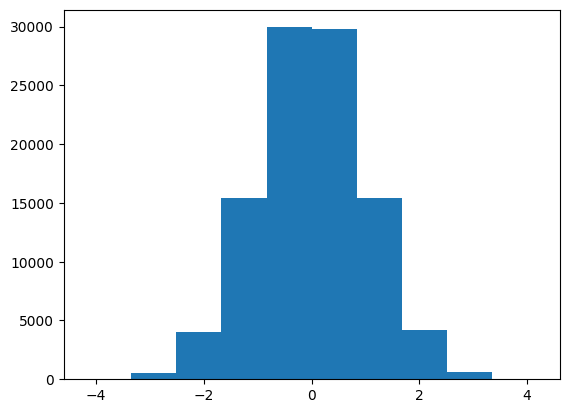

In [46]:
h = plt.hist(array)

In [50]:
np.quantile(array, 0.5)

0.00039086585331934325

In [48]:
np.percentile(array, 60)

0.2531257135656754

In [49]:
np.median(array)

0.00039086585331934325

In [53]:
np.mean(array)

0.002103887191368967

In [51]:
arr = np.arange(1, 10)
weights = 1/arr

In [52]:
np.average(arr, weights=weights)

3.181371861411138

In [55]:
#----------------------- корреляция -----------------------------------

a = np.arange(10)
b = a[::-1]


In [57]:
np.corrcoef(a,b)

array([[ 1., -1.],
       [-1.,  1.]])

In [5]:
#-------------------------- Describe -----------------------------

df = pd.DataFrame({'feayure_1':np.random.rand(1000), 
                   'feayure_2':np.random.rand(1000)*3+4, 
                   'feayure_3':np.random.rand(1000)*0.1-3})
df

,feayure_1,feayure_2,feayure_3
0,0.776777,4.888752,-2.972028
1,0.738614,6.081232,-2.946601
2,0.952183,6.113127,-2.972778
3,0.588415,5.767282,-2.922472
4,0.982497,6.824108,-2.908012
...,...,...,...
995,0.718510,5.176405,-2.971694
996,0.960005,5.284634,-2.984486
997,0.950116,5.135373,-2.993813
998,0.938043,5.112948,-2.970222


In [6]:
df.describe()

,feayure_1,feayure_2,feayure_3
count,1000.000000,1000.000000,1000.000000
mean,0.520546,5.506608,-2.950636
std,0.289766,0.859150,0.028686
min,0.000527,4.001412,-2.999905
25%,0.274095,4.756466,-2.973836
50%,0.538621,5.484067,-2.952884
75%,0.770238,6.271314,-2.926359
max,0.997993,6.995671,-2.900042


In [8]:
df = pd.read_csv('abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [9]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [19]:
#---------------------------------- скользящие окна --------------------------------------------
def plot_rolling(df):
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df.Y, label='raw data')
    plt.plot(df.Y.rolling(window=12).mean(), label='rolling mean')
    plt.plot(df.Y.rolling(window=12).std(), label='rolling std (x10)')
    plt.legend()

C:\Users\and_b\AppData\Local\Temp\ipykernel_9376\2583749699.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


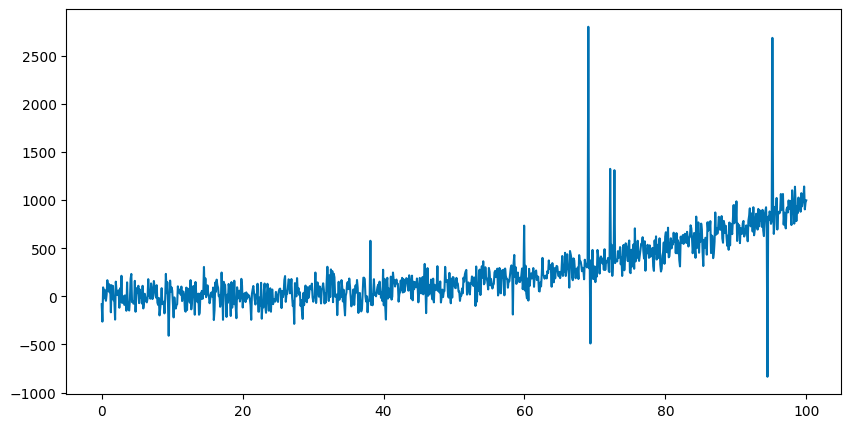

In [16]:
plt.style.use('seaborn-colorblind')

f = lambda x: x**3 - 2*x**2 + x - 1
f_q = lambda x: f(x)/1000 + np.random.randn(1)*100
X = np.linspace(0, 100, 1000)
Y = np.array([f_q(x) for x in X])

for i in range(20):
    ind = np.random.choice(np.arange(1000))
    Y[ind] = Y[ind] + np.random.choice([1, -1], p=[0.7, 0.3]) * Y[ind] / 0.5

plt.figure(figsize=(10, 5))
plt.plot(X, Y)

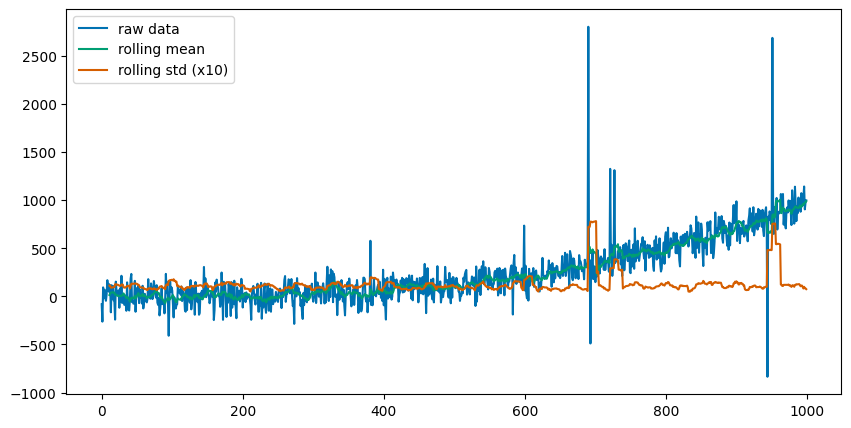

In [20]:
df = pd.DataFrame({'Y': Y.reshape(-1)})

plot_rolling(df)

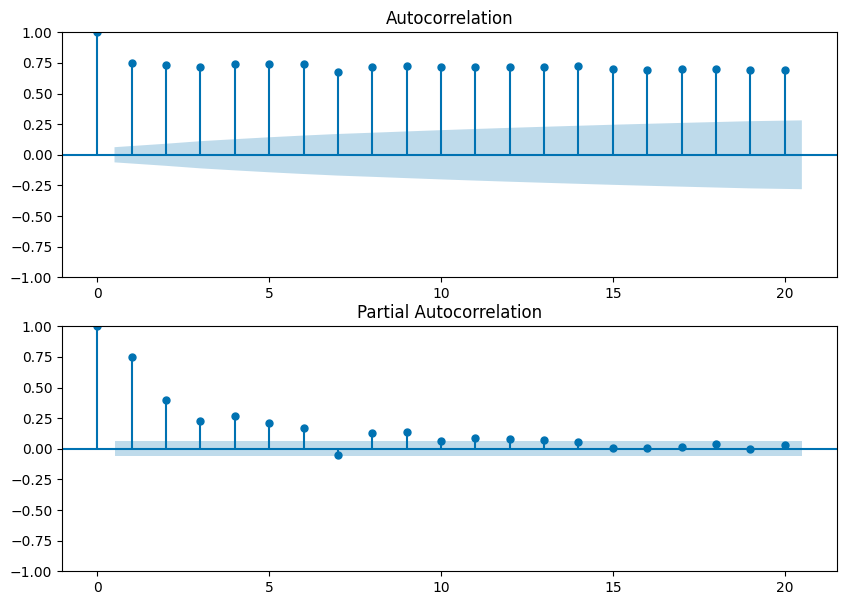

In [23]:
#------------------------- автокорреляция ------------------------------------------
fg, ax = plt.subplots(2, figsize=(10, 7))
ax[0] = plot_acf(df.Y.dropna(), ax=ax[0], lags=20)
ax[1] = plot_pacf(df.Y.dropna(), ax=ax[1], lags=20)

In [26]:
#------------------------------ EWM и сглаживание ------------------------------------------------

df = pd.DataFrame({'B':[0, 1, 2, 3, 4]})
df.ewm(com=1)

ExponentialMovingWindow [com=1,min_periods=1,adjust=True,ignore_na=False,axis=0,method=single]

In [27]:
df.ewm(com=1).mean()

,B
0,0.000000
1,0.666667
2,1.428571
3,2.266667
4,3.161290


<Axes: >

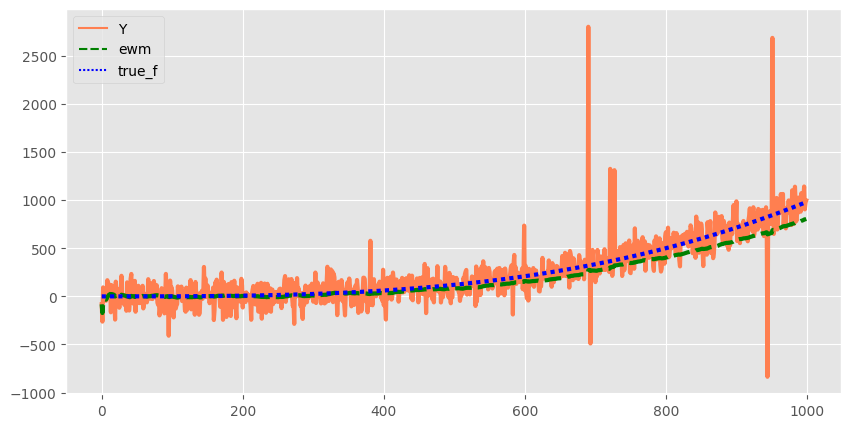

In [35]:
#------------------------------- борьба с выбросами с помлщью ewm -----------------------------------------

df = pd.DataFrame({'Y': Y.reshape(-1)})
df['ewm'] = df.Y.ewm(70).mean()
df['true_f'] = [f(x)/1000 for x in X]
plt.figure(figsize=(10, 5))
plt.style.use('ggplot')
sns.lineplot(data=df, palette=['#ff7f50', 'g', 'b'], linewidth= 3)